# Emergency 911 Calls  Project
**Montgomery County, Pennsylvania (source: kaggle.com) **

## Objectives:
* To analyse 911 Calls from Kaggle using python skills.
* To find what locations (specifically, what zip codes and townships) had the most 911 Calls in Montgomery County, located in Pennsylvania.
* Futher finding the main cause to call 911 like Emergency, Fire, and Traffic and plot it to get graphical representation of reasons and it counts.
* To see what Time, Day of week, and Month getting higher amount of calls.
* To getting clear view of number of calls in particular Day of week and in Month by count plot.
* To analyse particular reasons of calls in respect of date and plotting 3 seperate plot.
* To find bussy hours and months off Day of week by plotting heatmap and clustermap.


###  ** Data Analysis libraries imports **

In [4]:
import numpy as np
import pandas as pd

### ** Data visualization libraries and set %matplotlib inline. **

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### ** Read in the csv file **

In [6]:
df = pd.read_csv('911.csv')

### ** Checking the information of DataFrame **

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### ** First few rows of DataFrame **

In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Top 5 Zipcodes for 911 Calls


In [9]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

## Top 5 Township for 911 Calls

In [10]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Number of unique reasons in 'title' column

In [11]:
df['title'].nunique()

110

## Creating new feature

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Seperating Reasons and stores to a new column called "Reason" that contains this string value.** 


In [12]:
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0])

## **Analysing the most common reasons for call based on new column created **

In [13]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Countplot of 911 calls by Reason using seaborn. 

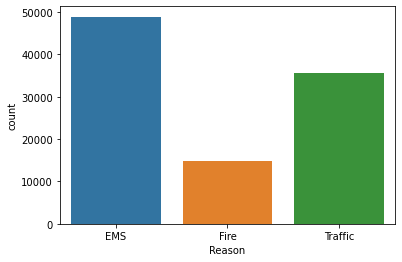

In [14]:
sns.countplot(x='Reason',data=df)

### The highest number of 911 calls are for Emergency almost 5000, followed by Traffic and Fire
____________________________________________________________________________________________________________

In [16]:
type(df['timeStamp'].iloc[0])

str

** Changing 'timeStamp' column type from str to DateTime Objects using pd.to_datetime. So that it become easy to grab the year, day, month, time from 'timeStamp' column **

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


**Now that the timestamp column are actually DateTime objects, creating a 3 a new columns called Hour, Month, and Day of Week , based off of the timeStamp column**

In [18]:
time = df['timeStamp'].iloc[0]
time.year

2015

In [72]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x : x.dayofweek)

In [73]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


________________________________________
### Converting Day of Week from integer 0-6 to actual string names to the day of the week with dictionary to map 

    

In [74]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
type('Day of Week')

str

In [77]:
df['Day of Week'] = df['Day of Week'].apply(lambda x: dmap[x])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


## Countplot of the Day of Week column with the hue based off of the Reason column.

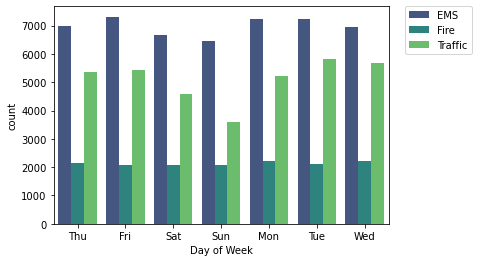

In [78]:
sns.countplot(x='Day of Week', hue='Reason', palette = 'viridis', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Countplot of the Month column with the hue based off of the Reason column.

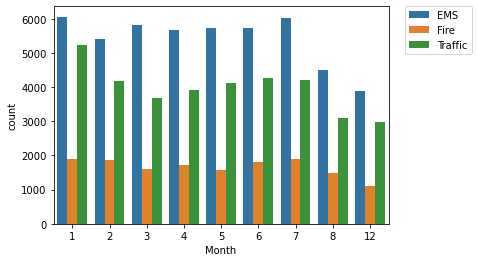

In [80]:
sns.countplot(x='Month', data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Some Months are missing in plot.**

_____

Grouping the data by Month and creating a simple line plot to fill the missing Months.

In [81]:
byMonth = df.groupby('Month').count()

In [83]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Simple plot off of the dataframe indicating the count of calls per month.**

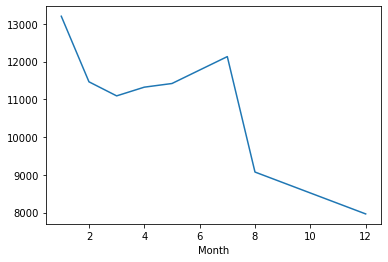

In [20]:
byMonth['twp'].plot()

**Creating a linear fit plot on the number of calls per month.**

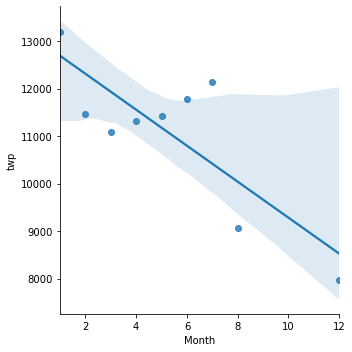

In [21]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

# Creating a new column 'Date'

**Creating a new column called 'Date' that contains the date from the timeStamp column to actually plot the Calls on date** 

In [84]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

** A simple plot of counts of 911 calls.**

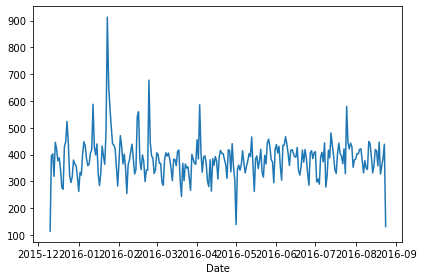

In [23]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Creating 3 separate plots with each plot representing a Reason for the 911 call**

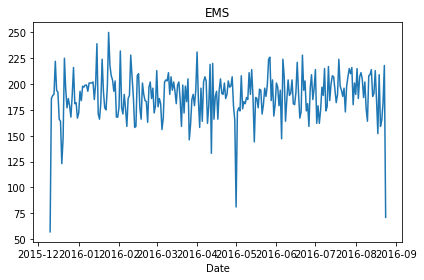

In [86]:
df[df['Reason']== 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

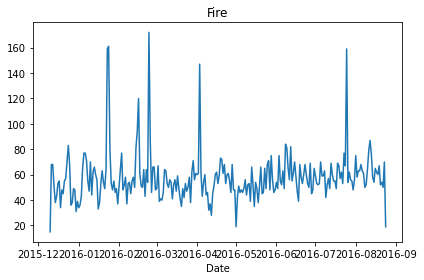

In [87]:
df[df['Reason']== 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

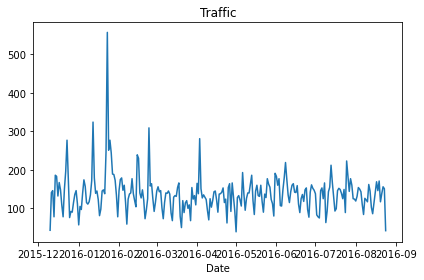

In [88]:
df[df['Reason']== 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

____
** Restructing the dataframe so that the columns become the Hours and the Index becomes the Day of the Week for creating the heatmap.**

In [28]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


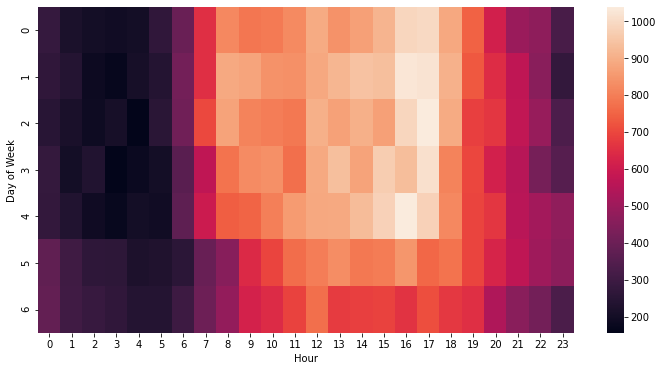

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour)

**clustermap using this DataFrame.**

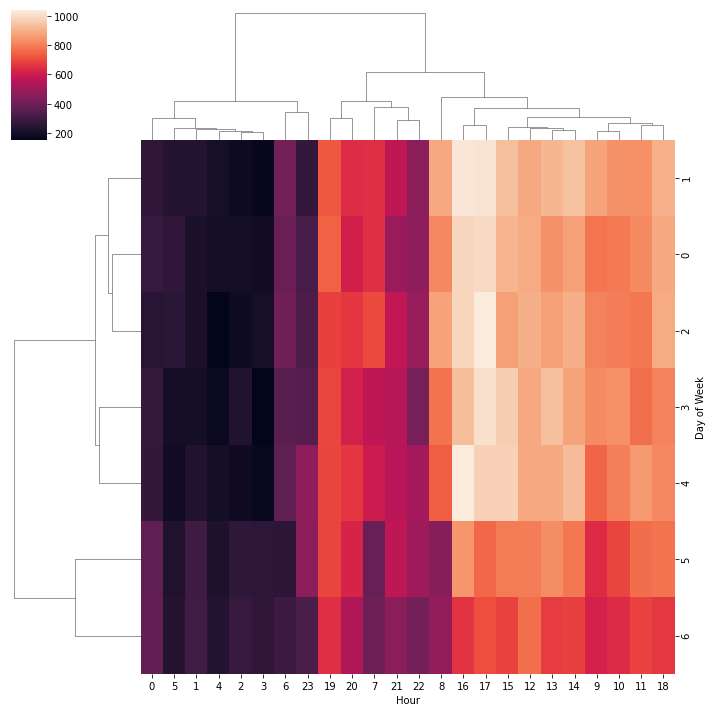

In [34]:
sns.clustermap(data=dayHour)

** Same plots and operations, for a DataFrame that shows the Month as the column. **

In [35]:
month = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
month.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065


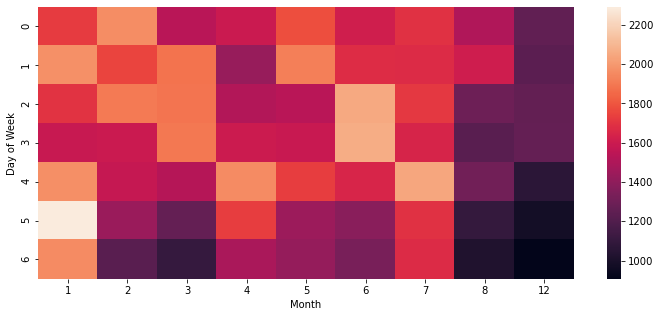

In [60]:
plt.figure(figsize=(12,5))
sns.heatmap(data=month)

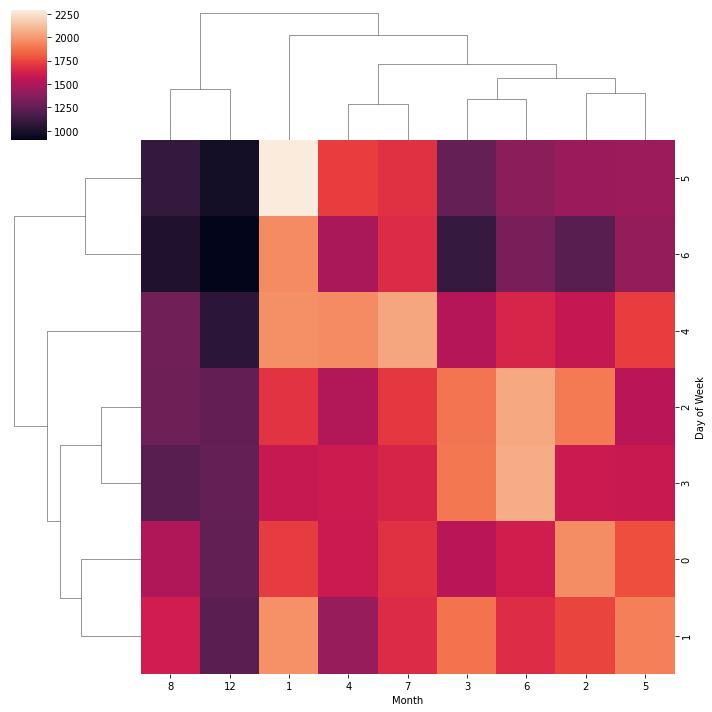

In [61]:
sns.clustermap(data=month)

#   ** End Of Project **